In [5]:
import jax.numpy as jnp
from jax import random
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def frechet_inverse_cdf(n, a, s, l, rng_key):
  """
  n= int, no. of samples
  a= float, shape parameter
  s= float, scale parameter
  l= float, location paramenter
  """
  u_r_n = random.uniform(rng_key, shape=(n,))
  x = s* ((-jnp.log(u_r_n)) ** (-1/a)) + l
  return x

In [9]:
"""
defining parameters and generating  15000 samples
"""
a=2.0
s=2.0
l=0.0
n=15000
rng_key=random.PRNGKey(0)

<AxesSubplot:ylabel='Density'>

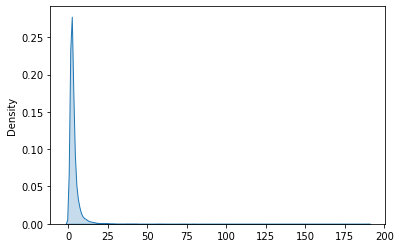

In [11]:
data= frechet_inverse_cdf(n,a,s,l,rng_key)
sns.kdeplot(data, shade=True)

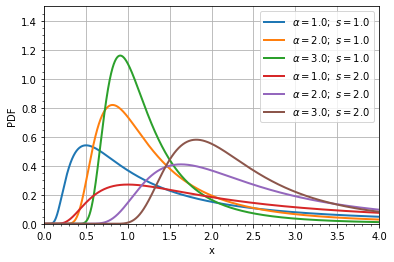

In [13]:
def calc_frechet_pdf(x, a, s):
   return (a / s) * ((x / s) ** -(a + 1)) * jnp.exp(-(x / s) ** -a)

# Define range of x values
x = jnp.linspace(0, 4, 10**5)

# Define parameters for different Fréchet distributions
params = [(1., 1.), (2., 1.), (3., 1.), (1., 2.), (2., 2.), (3., 2.)]

# Plot PDF for each parameter combination
fig, ax = plt.subplots()
for a, s in params:
    ax.plot(x, calc_frechet_pdf(x, a, s), label=fr'$\alpha={a};$ $s={s}$', linewidth=2)

ax.grid(True)
ax.minorticks_on()
ax.legend(loc=1)
ax.set_xlim(0, 4)
ax.set_ylim(0, 1.5)
ax.set_xlabel("x")
ax.set_ylabel("PDF")
plt.savefig("Frechet_pdf.svg", bbox_inches="tight", pad_inches=.15)